The following comes from Casella's Monte Carlo Statistical Methods book, section 3.2.

$$
\mathbb{E}_f [h(X)]
=
\int_{\chi} h(x) f(x) dx
$$

$\mathbb{E}_f [h(X)]$ stands for the expected value of $h(X)$, where $X$ is a random vairbale with pdf $f$.

$\chi$ denotes the sample space of of $X$. For the univariate case, $\chi \subset \mathbb{R}$.
For the multivariate case, $\chi \subset \mathbb{R}^m$, and it is said to have some volume $\int_\chi dx$.

And, last but not least, $h(x)$ is some generic function.


An estimate to this expected value can be made by drawin $m$ samples, $(X_1, \ldots , X_m)$, from the density $f$, and use the empirical average:

$$
\overline{h}_m = 
\sum^{m}_{j=1} h(x_j)
$$

Then the law of large numbers says that
$$
\lim_{m \rightarrow \infty} \overline{h}_m = \mathbb{E}_f [h(X)]
$$

And to measure the speed of convergence, we can compute the variance, if $h^2$ has a finite expectation value under $f$.
Thus, the speed fo convergence of $\overline{h}_m$ can be assessed with

$$
var(\overline{h}_m) =
\frac{1}{m} \int_\chi \left( h(x) - \mathbb{E}_f[h(X)] \right)^2
$$

Which can also be estimated with our sample $(X_1, \ldots, X_m)$ from the density $f$

$$
v_m = 
\frac{1}{m^2} \sum^{m}_{j=1} \left( h(x_j) - \overline{h}_m \right)^2
$$

Note that this estimate of the variance, $v_m$, has a factor $1/m^2$.
Typically, when estimating the variance of individual observations, we divide by $m-1$
(for an unbiased estimate of the population variance) or $m$ (for the mean of the squared deviations).
However, $v_m$ is not estimating the variance of $h(x)$ but of $\overline{h}_m$.


Another interesting thing to keep in mind is that for large $m$,
$$
\frac{ \overline{h}_m - \mathbb{E}_f [h(X)] }{ \sqrt{v_m} }
$$
is approximately distributed as $N(0,1)$.
Which leads to the construction of a convergence test and of confidence bounds on the approximation of $\mathbb{E}_f [h(X)]$.

# Example 3.9 from Casella

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [43]:
def v_m(h, h_bar):
    m = len(h)
    return (1.0/m**2) * np.sum( np.square([x - h_bar for h in h]) )

In [2]:
def h(x):
    return np.square( np.cos(50*x) + np.sin(20*x) )

In [16]:
x = np.linspace(0, 1, 50)
h_x = h(x)

In [17]:
samples = 10_000
u = np.random.uniform(0, 1, samples)
h_u = h(u)

In [120]:
def approximate_h(max_samples: int):
    increment_size = 50

    iterations = int(max_samples / increment_size)
    print(f'copmuting {iterations} approximations...')
    
    mean_approximations = np.zeros(iterations)
    err_approximations = np.zeros(iterations)
    num_samples = np.zeros(iterations)
    sem_errors = np.zeros(iterations)
    
    for i in range(0, iterations):
        samples = increment_size + (i * increment_size)
        u = np.random.uniform(0, 1, samples)
        
        h_u = h(u)
        h_bar = np.mean(h_u)
        
        mean_approximations[i] = h_bar
        err_approximations[i] = v_m(h_u, h_bar)
        num_samples[i] = samples
        sem_errors[i] = scipy.stats.sem(h_u)

    return mean_approximations, err_approximations, num_samples, sem_errors

In [103]:
%timeit -r 1 -n 1 approximate_h(100)

copmuting 2 approximations...
9.95 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [104]:
%timeit -r 1 -n 1 approximate_h(1_000)

copmuting 20 approximations...
55.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [105]:
%timeit -r 1 -n 1 approximate_h(10_000)

copmuting 200 approximations...
1.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [121]:
means, errors, num_samples, sem_errors = approximate_h(10_000)

copmuting 200 approximations...


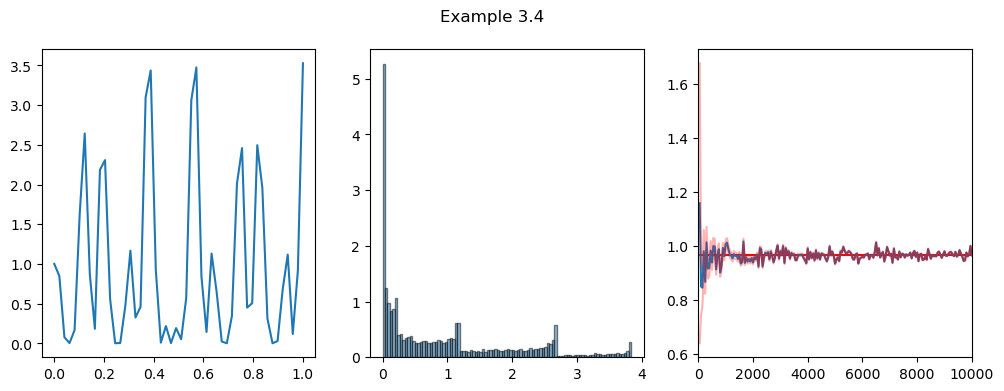

In [122]:
# If you want them vertically stacked then do plt.subplots(2).
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Example 3.4')

ax1.plot(x, h_x)
ax2.hist(h_u, bins=100, edgecolor="black", alpha=0.5, density=True)

ax3.set_xlim(0, 10_000)
ax3.axhline(y=0.965, color='r', linestyle='-')
ax3.plot(num_samples, means)
ax3.plot(num_samples, means-errors, alpha=0.3, color='red')
ax3.plot(num_samples, means+errors, alpha=0.3, color='red')

plt.show()

[]

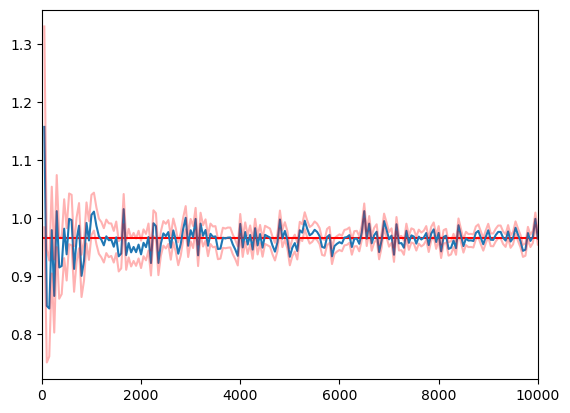

In [123]:
plt.xlim(0, 10_000)
plt.axhline(y=0.965, color='r', linestyle='-')
plt.plot(num_samples, means)
plt.plot(num_samples, means-sem_errors, alpha=0.3, color='red')
plt.plot(num_samples, means+sem_errors, alpha=0.3, color='red')
plt.plot()

In [124]:
means[-5:], errors[-5:], sem_errors[-5:]

(array([0.97420815, 0.96055407, 0.96766619, 0.99863266, 0.96470557]),
 array([0.00158984, 0.00151698, 0.00154266, 0.00168527, 0.00151343]),
 array([0.0106008 , 0.01050299, 0.01048469, 0.01069922, 0.01050285]))